## Hands-on - Visualisation

In [151]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator # added this to get full years in excercise 6
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import shapiro

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/main/World-happiness-report-updated_2024.csv"

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path, encoding='latin1')

# Clean dataframe of nan values
df = df.dropna()

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")
print(df.head(5))

Dataset Preview:
  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative a

### **Question 1: Create a histogram of the 'Life Ladder'**
#### Hint: Use plt.hist() or sns.histplot() to show distribution of a single variable

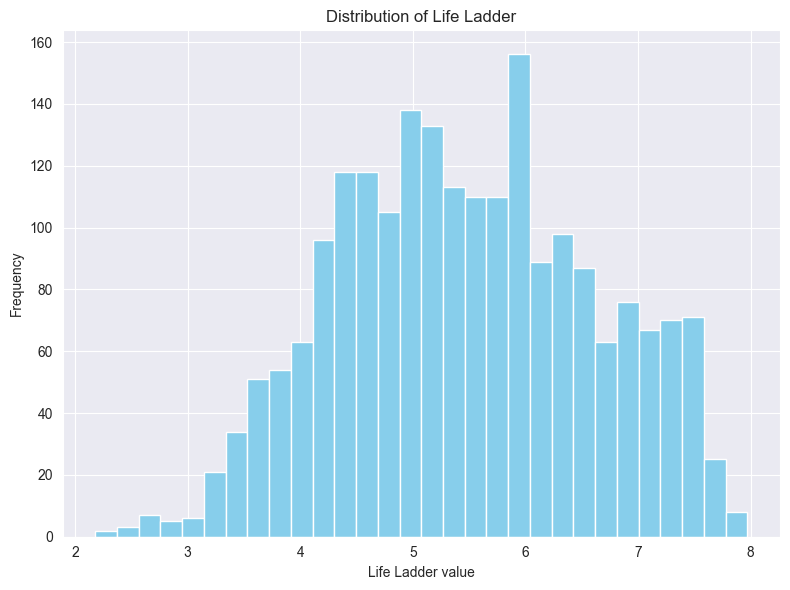

In [152]:
plt.figure(figsize=(8,6))

plt.hist(df['Life Ladder'], bins=30, color='skyblue')

plt.title('Distribution of Life Ladder')
plt.xlabel('Life Ladder value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### **Question 2: Create a scatter plot of 'Log GDP per capita' vs 'Life Ladder'**
#### Hint: Use sns.scatterplot(x=..., y=...) or plt.scatter()

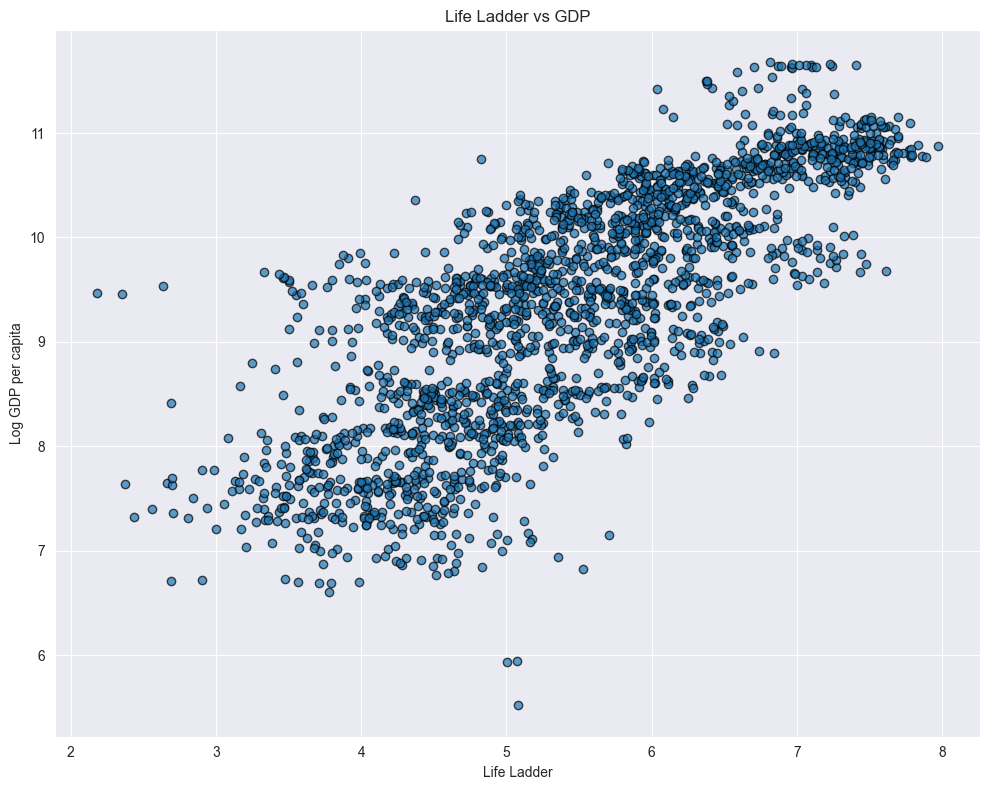

In [153]:
plt.figure(figsize=(10,8))
plt.scatter(
    df['Life Ladder'],
    df['Log GDP per capita'],
    alpha=0.7,
    edgecolors='black'
)
plt.xlabel('Life Ladder')
plt.ylabel('Log GDP per capita')
plt.title('Life Ladder vs GDP')
plt.tight_layout()
plt.show()

### **Question 3: Create a box plot to show distribution of 'Life Ladder' by 'year'**
#### Hint: Use sns.boxplot(x='Regional indicator', y='Life Ladder', data=df) and rotate x-labels for readability

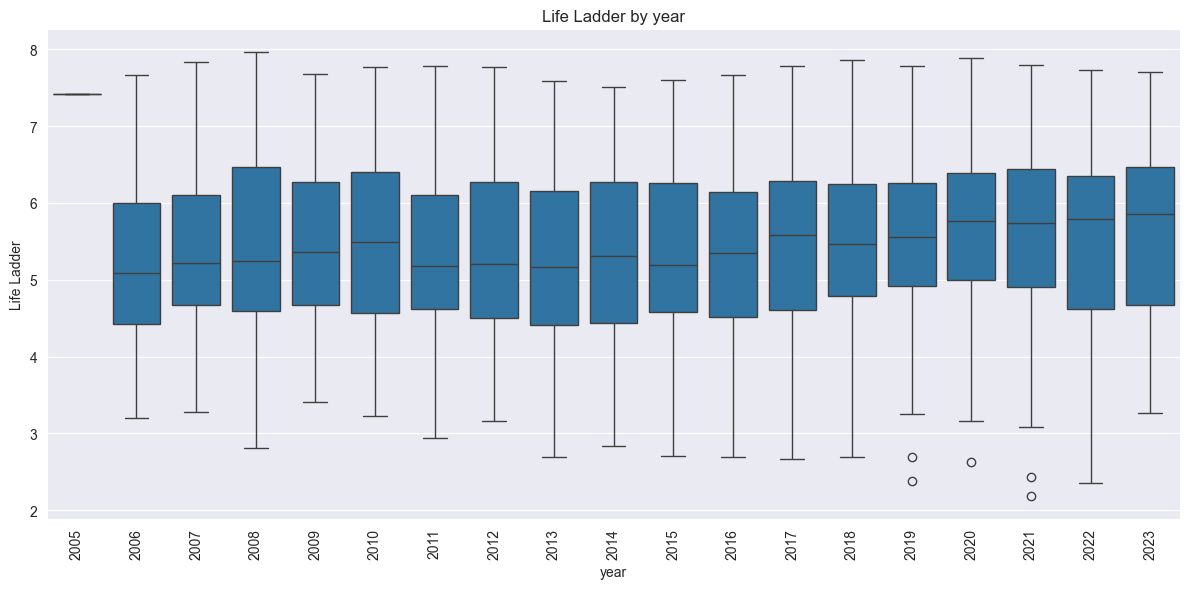

In [154]:
plt.figure(figsize=(12,6))

sns.boxplot(x='year', y='Life Ladder', data=df)

plt.title('Life Ladder by year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **Question 4: Create a heatmap to show correlation between numerical features**
#### Hint: Use df.corr() to calculate correlation matrix, then sns.heatmap()

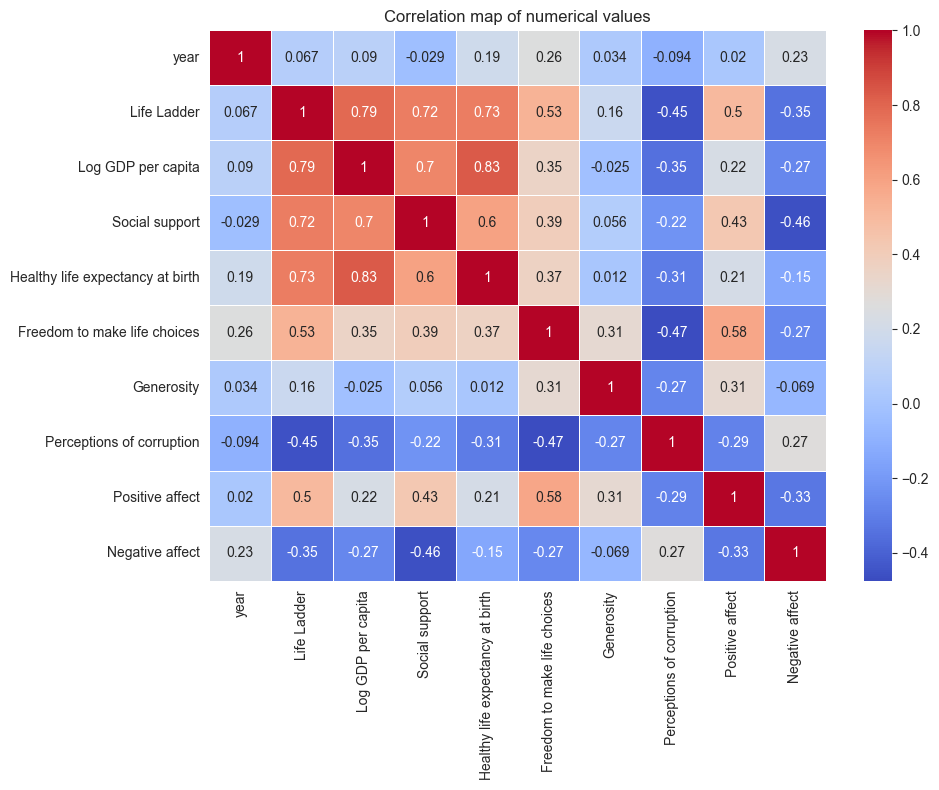

In [155]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation map of numerical values')
plt.tight_layout()
plt.show()

### **Question 5: Create a residual plot for 'Life Ladder' prediction using 'Log GDP per capita'**
#### Hint: Use LinearRegression to predict, then subtract predictions from actuals and plot with plt.scatter()

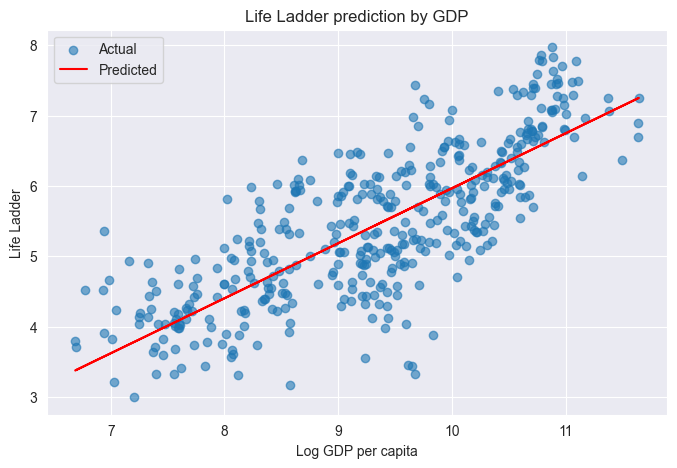

In [156]:
x = df[['Log GDP per capita']]
y = df['Life Ladder']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Initialize and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values for the test set
y_pred = model.predict(X_test)

# Visualize results

plt.figure(figsize=(8, 5))

plt.scatter(X_test, y_test, label='Actual', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Predicted')

plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Life Ladder prediction by GDP")

plt.legend()
plt.show()

### **Question 6: Create a line plot showing 'Healthy life expectancy at birth' over years for top 5 countries**
#### Hint: Group by 'Country name', take top 5 by average life expectancy, then use sns.lineplot() to show trends over time

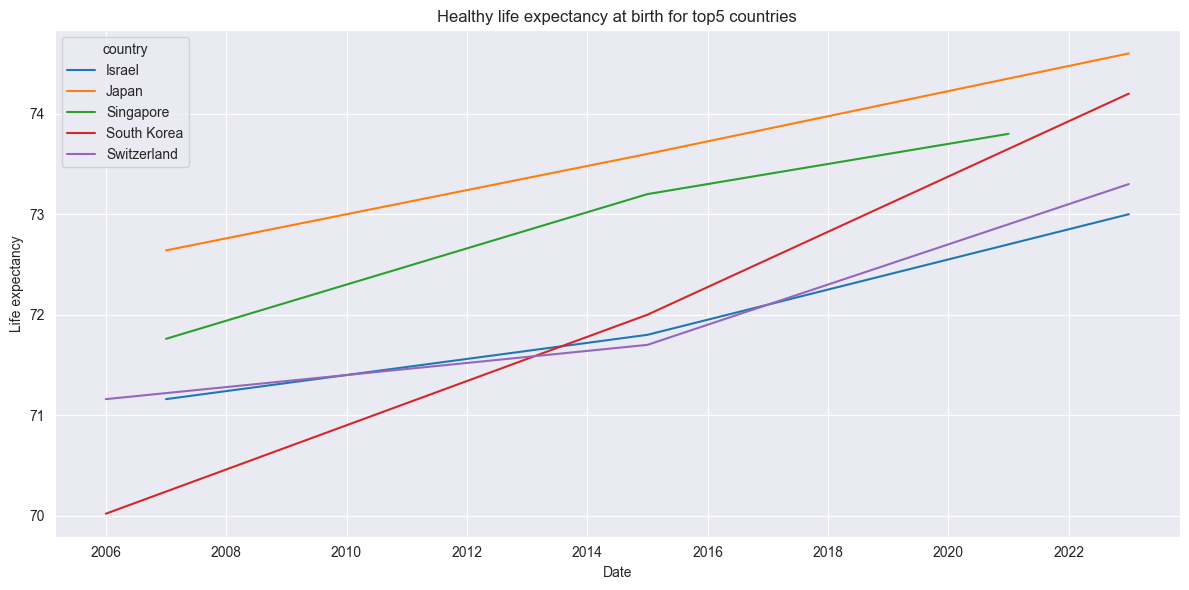

In [157]:
df_grouped = df.groupby('Country name')['Healthy life expectancy at birth'].mean().reset_index()
df_grouped = df_grouped.sort_values(by='Healthy life expectancy at birth', ascending=False)
top5_countries = df_grouped.head(5)['Country name'].to_numpy()

df_filtered = df[df['Country name'].isin(top5_countries)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtered, x='year', y='Healthy life expectancy at birth', hue='Country name')
plt.title('Healthy life expectancy at birth for top5 countries')
plt.xlabel('Date')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Life expectancy')
plt.legend(title='country')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Question 7: Create a bar chart of average 'Social support' for top 10 countries in 2023**
#### Hint: Filter the dataset for 2023, group by 'Country name', then plot the top 10 using bar chart

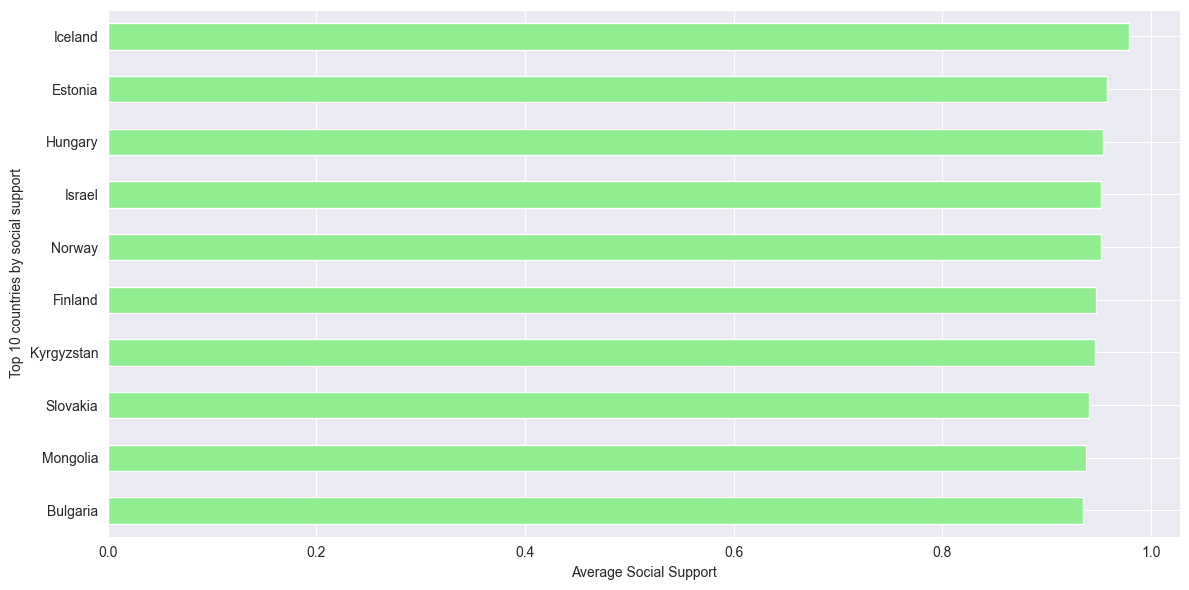

In [158]:
df_2023 = df[df['year'] == 2023]
df_2023_grouped = df_2023.groupby('Country name')['Social support'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))

df_2023_grouped.plot(kind='barh', color='lightgreen')

plt.xlabel('Average Social Support')
plt.ylabel('Top 10 countries by social support')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### **Question 8: Create a pie chart showing proportion of 'Country name' in the dataset (top 10 countries)**
#### Use df['Country name'].value_counts().head(10) and plt.pie() to show the most frequently appearing countries

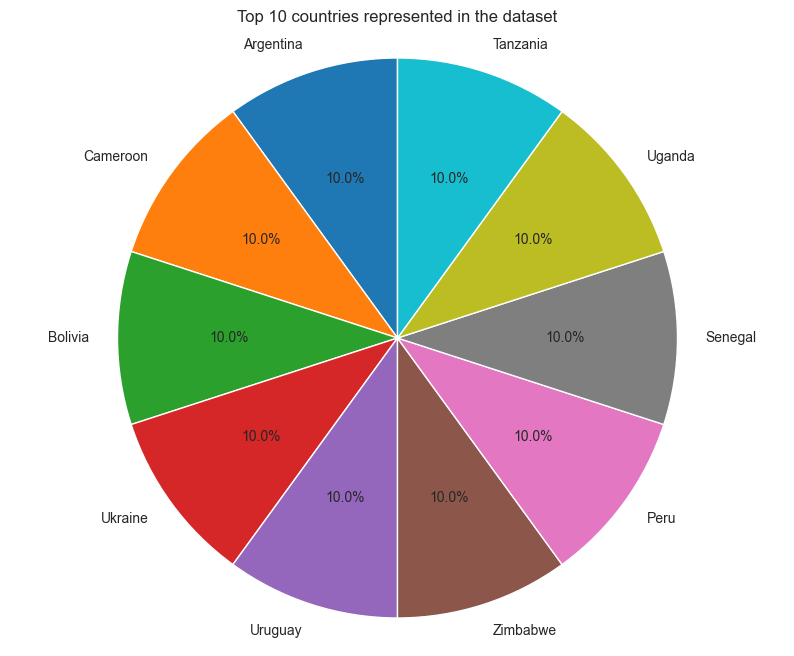

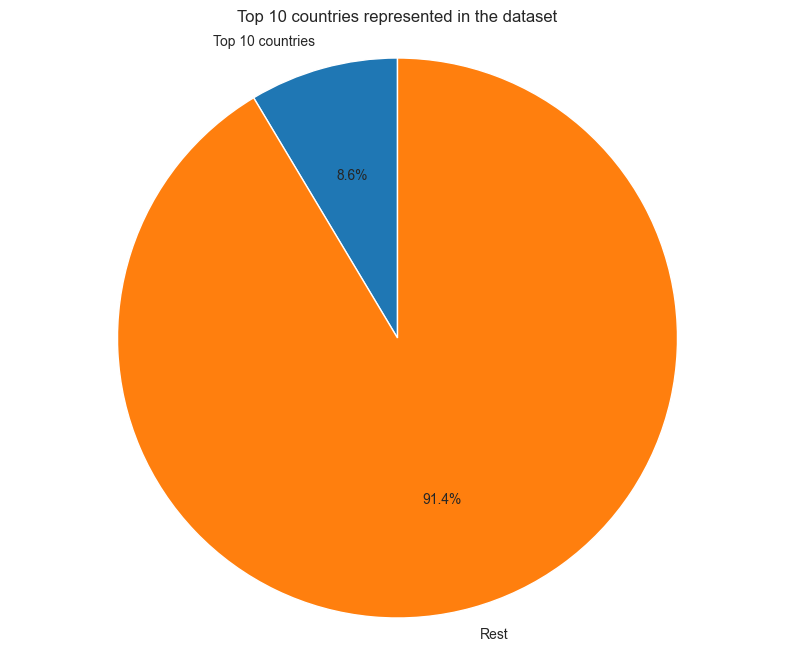

In [159]:
df_counts = df['Country name'].value_counts().head(10).reset_index()
df_counts.columns = ['Country name', 'appearance count']

plt.figure(figsize=(10,8))
plt.pie(df_counts['appearance count'], labels=df_counts['Country name'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Top 10 countries represented in the dataset")
plt.show()

top10_count = df_counts['appearance count'].sum()

df_rest = df['Country name'].value_counts()[10:-1].reset_index()
df_rest.columns = ['Country name', 'appearance count']
rest_count = df_rest['appearance count'].sum()

plt.figure(figsize=(10,8))
plt.pie([top10_count, rest_count], labels=['Top 10 countries', 'Rest'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Top 10 countries represented in the dataset")
plt.show()

### **Question 9: Perform Linear Regression to predict 'Life Ladder' using multiple predictors**
#### Hint: Use 'Log GDP per capita', 'Social support', and 'Healthy life expectancy at birth' as X variables and fit a model

(2097, 3)
(2097,)


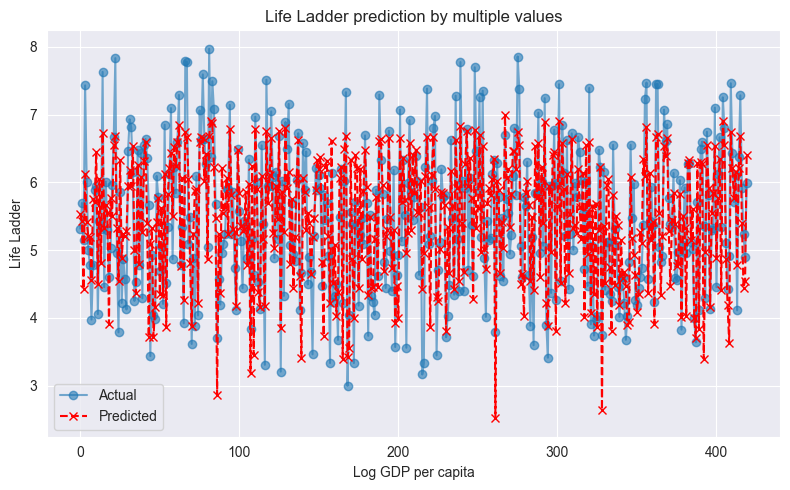

In [164]:
x = df[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']]
y = df['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Visualize results
plt.figure(figsize=(8, 5))

plt.plot(y_test.values, label='Actual', marker='o', alpha=0.6)
plt.plot(y_pred, label='Predicted', marker='x', linestyle='--', color='red')

plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Life Ladder prediction by multiple values")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **Question 10: Plot residuals from the model above**
#### Hint: Subtract predicted values from actual 'Life Ladder', then plot residuals vs predictions using plt.scatter()

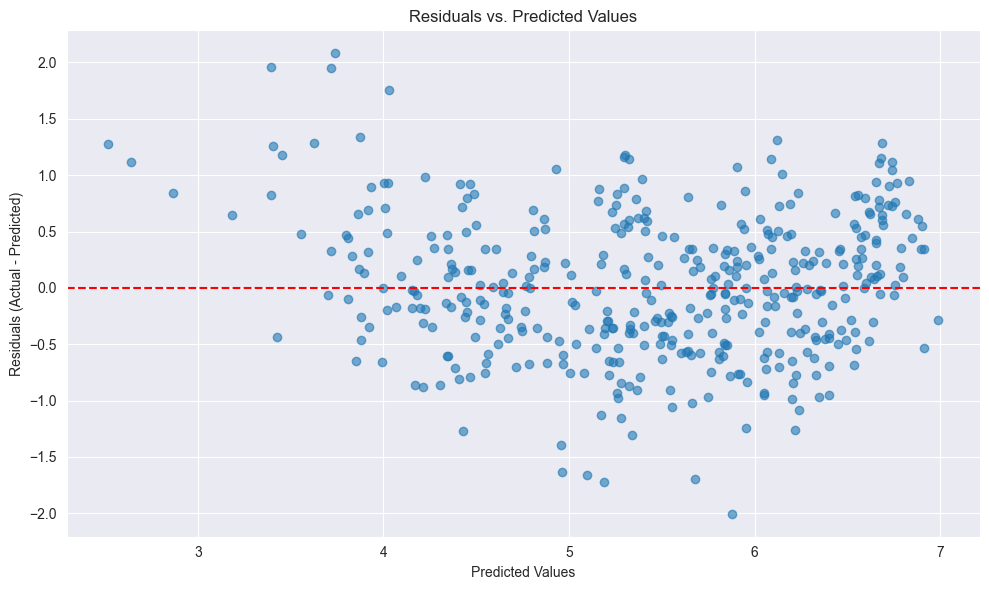

In [165]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()